In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2 as cv
import glob
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:

class ContrastData:
    param=None
    #CONSTRUCTORES:---------------------------
    def __init__(self,image,contrast_level,operation):
        self.image=image
        self.contrast_level=contrast_level
        self.operation=operation
        
    def __init__(self,image,contrast_level,operation,param):
        self.image=image
        self.contrast_level=contrast_level
        self.operation=operation
        self.param=param
    #-------------------------------------------
    
def apply_transformation(gris_image,operation_name,gamma=None):
        if(operation_name=='gamma'):
            c = 255/(pow(np.max(gris_image),gamma)) 
            gamma_transformed = c * pow(gris_image,gamma) 
            gamma_transformed = np.array(gamma_transformed, dtype = np.uint8)
            file_name=operation_name+'_transformed_FALSO.jpg'
            cv.imwrite(file_name, gamma_transformed)
            img2 = cv.imread(cv.samples.findFile(file_name))
            gris2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
            histograma = cv.calcHist([gris2], [0], None, [256], [0, 256])

            # Normalizar el histograma para que su suma sea 1 (convertirlo en una distribución de probabilidad)
            histograma_normalizado = histograma.ravel() / histograma.sum()

            # Calcular los niveles de grises (de 0 a 255)
            niveles_grises = np.arange(256)

            # Calcular la media ponderada de los niveles de grises
            media_ponderada = (niveles_grises * histograma_normalizado).sum()

            # Calcular la desviación estándar ponderada (una medida de dispersión)
            desviacion_estandar = np.sqrt(((niveles_grises - media_ponderada)**2 * histograma_normalizado).sum())

            print(f"Desviación estándar de los niveles de grises (medida de contraste): {desviacion_estandar}")
            return ContrastData(gris2,desviacion_estandar,operation_name,param=gamma) 

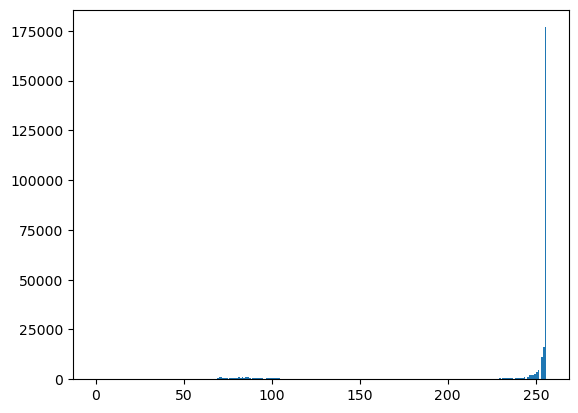

In [3]:
#1º PASAR A NIVELES DE GRISE
img = cv.imread(cv.samples.findFile("Photos/cocacola.jpg"))
gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.hist(gris.ravel(),256,[0,256]);
plt.show()

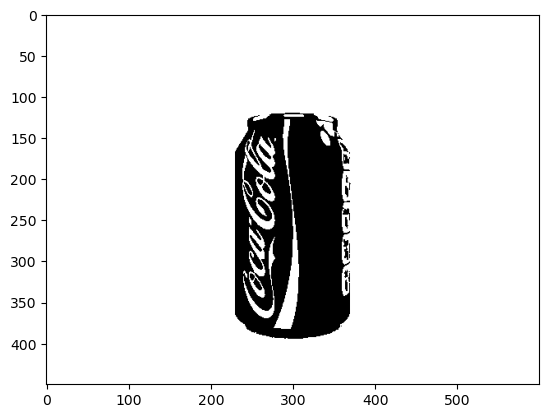

In [4]:
#método oztu:
_, imagen_umbralizada = cv.threshold(gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(imagen_umbralizada, cmap='gray')     # cmap='gray' asegura que la imagen se muestre en niveles de grises

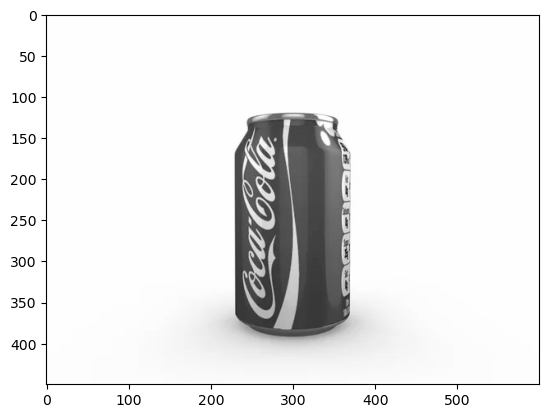

In [18]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(100,100))
imagen_cerrada = cv.morphologyEx(imagen_umbralizada, cv.MORPH_OPEN, kernel)
plt.imshow(imagen_cerrada+gris, cmap='gray')

In [26]:
luminancia_figura = np.mean(gris[imagen_umbralizada == 255])

# Calcular la luminancia promedio del fondo
luminancia_fondo = np.mean(gris[imagen_umbralizada == 0])

# Calcular el contraste
# Este es un ejemplo sencillo usando la diferencia de luminancias. Considera ajustarlo según tus necesidades
contraste = luminancia_figura - luminancia_fondo
print(f"Contraste: {contraste}")

Contraste: 127.72078050743114


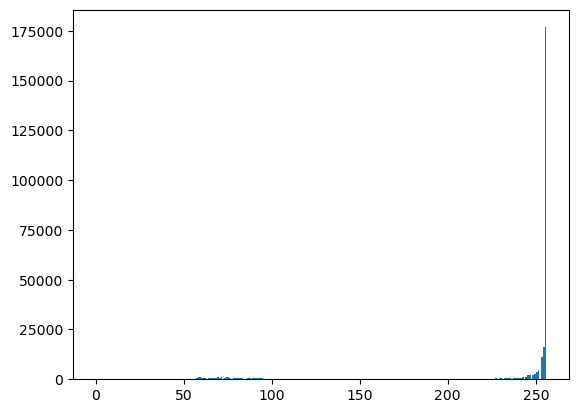

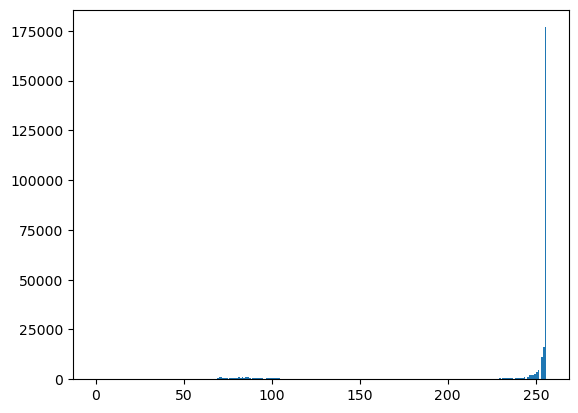

In [41]:
#EXPANSIÓN DEL HISTOGRAMA:
min_val, max_val, _, _ = cv.minMaxLoc(gris)
expandida = cv.normalize(gris, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
plt.hist(expandida.ravel(),256,[0,256]);
plt.figure()
plt.hist(gris.ravel(),256,[0,256]);

El método Oztu no sirve porque perdemos demasiada información, hay que aplicar transformaciones de intensidad para mejorar el contraste

Para este paso, será necesario hacer lo siguiente:
- 1ºAplicar diferentes operaciones y calcular nivel de contraste. Aquellos que necesiten un parámetro, se realizará una busqueda del valor óptimo. Ej: gamma
- 2ºUna vez hecho todas las operaciones, se escogerá aquella que tenga mayor nivel de contraste

Tras hacer eso, ya podremos capturar adecuadamente el contorno de la figura

Starting to process op: gamma ----------------
Desviación estándar de los niveles de grises (medida de contraste): 0.0
Desviación estándar de los niveles de grises (medida de contraste): 4.846855661486627
Desviación estándar de los niveles de grises (medida de contraste): 8.815896826349352
Desviación estándar de los niveles de grises (medida de contraste): 13.107050199148762
Desviación estándar de los niveles de grises (medida de contraste): 17.693151780586657
Desviación estándar de los niveles de grises (medida de contraste): 21.64682716281662
Desviación estándar de los niveles de grises (medida de contraste): 25.460684289605073
Desviación estándar de los niveles de grises (medida de contraste): 29.16446733290108
Desviación estándar de los niveles de grises (medida de contraste): 32.66862166128255
Desviación estándar de los niveles de grises (medida de contraste): 35.59423722387371
Desviación estándar de los niveles de grises (medida de contraste): 38.920151709327776
Desviación estánd

Desviación estándar de los niveles de grises (medida de contraste): 122.10113019689814
Desviación estándar de los niveles de grises (medida de contraste): 122.73170635592574
Desviación estándar de los niveles de grises (medida de contraste): 122.89390385897714
Desviación estándar de los niveles de grises (medida de contraste): 122.96602266165472
Desviación estándar de los niveles de grises (medida de contraste): 123.10468989865862
Desviación estándar de los niveles de grises (medida de contraste): 123.2438662233951
Desviación estándar de los niveles de grises (medida de contraste): 123.39789188616956
Desviación estándar de los niveles de grises (medida de contraste): 123.51991993650279
Desviación estándar de los niveles de grises (medida de contraste): 123.63878158721155
Desviación estándar de los niveles de grises (medida de contraste): 123.76722615671692
Desviación estándar de los niveles de grises (medida de contraste): 123.80222871175131
Desviación estándar de los niveles de grises

Desviación estándar de los niveles de grises (medida de contraste): 126.68573879744424
Desviación estándar de los niveles de grises (medida de contraste): 126.6939773888245
Desviación estándar de los niveles de grises (medida de contraste): 126.68552327910587
Desviación estándar de los niveles de grises (medida de contraste): 126.20825139808059
Desviación estándar de los niveles de grises (medida de contraste): 126.20566705026344
Desviación estándar de los niveles de grises (medida de contraste): 126.69687578822239
Desviación estándar de los niveles de grises (medida de contraste): 126.69835984724715
Desviación estándar de los niveles de grises (medida de contraste): 126.69834852241259
Finalization-----------------------------
Starting to process op: log ----------------
Finalization-----------------------------
Starting to process op: exp ----------------
Finalization-----------------------------


<Figure size 640x480 with 0 Axes>

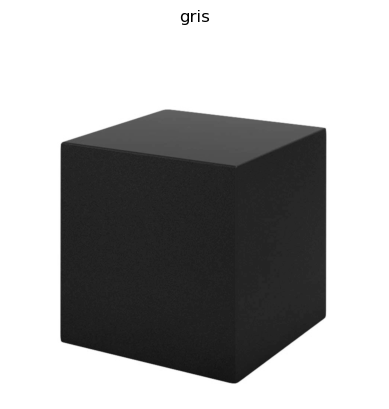

<Figure size 640x480 with 0 Axes>

In [18]:
#gamma,logaritmica,exponencial, ecualizacion y a trozos
data=[]
operations=['gamma','log','exp']
fig, ax = plt.subplots()
for op in operations:
    print('Starting to process op:',op,'----------------')
    if(op=='gamma'):
        for i in range(0,200):
            gamma=i/32
            t=apply_transformation(gris_image=gris,operation_name=op,gamma=gamma)
            data.append(t)
    print('Finalization-----------------------------')
plt.imshow(gris, cmap='gray')     # cmap='gray' asegura que la imagen se muestre en niveles de grises
plt.title('gris')         # Opcional: poner un título a cada subplot
plt.axis('off')
plt.figure()

0.3125


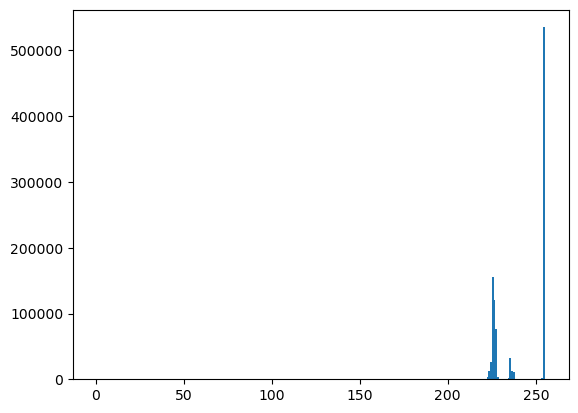

(-0.5, 999.5, 999.5, -0.5)

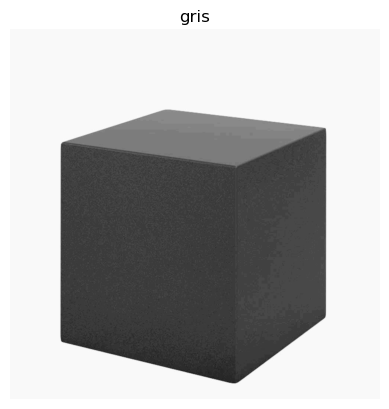

In [21]:
#2º OBTENER MAYOR CONTRASTE POSIBLE, AÑADIENDO EL MINIMO RUIDO POSIBLE
#PROBANDO CON T.GAMMA
gamma=data[10].param
print(gamma)
c = 255/(pow(np.max(data[10].image),gamma)) 
gamma_transformed = c * pow(data[10].image,gamma) 
  
gamma_transformed = np.array(gamma_transformed, dtype = np.uint8) 
  
# Save the output. 
cv.imwrite('gamma_transformed_NEW.jpg', gamma_transformed)
img2 = cv.imread(cv.samples.findFile("gamma_transformed_NEW.jpg"))
gris2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.hist(gris2.ravel(),256,[0,256]);
plt.show()
plt.figure()
plt.imshow(gris2, cmap='gray')     # cmap='gray' asegura que la imagen se muestre en niveles de grises
plt.title('gris')         # Opcional: poner un título a cada subplot
plt.axis('off')

In [23]:
# Detectamos los bordes con Canny
canny = cv.Canny(imagen_umbralizada, 50, 150)
 
cv.imshow("canny", canny)
 
# Buscamos los contornos
(contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv.drawContours(img,contornos,-1,(0,0,255), 2)

 
cv.waitKey(0)

He encontrado 34 objetos


-1

In [ ]:
# Aplicar suavizado Gaussiano
gauss = cv.GaussianBlur(gris, (5,5), 0)
 
cv.imshow("suavizado", gauss)
 
# Detectamos los bordes con Canny
canny = cv.Canny(gauss,10, 150)
 
cv.imshow("canny", canny)
 
# Buscamos los contornos
(contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv.drawContours(img,contornos,-1,(0,0,255), 2)
cv.imshow("contornos", img)
 
cv.waitKey(0)